<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Military-expenditure-over-time-analysis" data-toc-modified-id="Military-expenditure-over-time-analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Military expenditure over time analysis</a></span><ul class="toc-item"><li><span><a href="#Importing-libraries-and-dataset" data-toc-modified-id="Importing-libraries-and-dataset-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Importing libraries and dataset</a></span></li><li><span><a href="#Setting-year-as-datetime-index" data-toc-modified-id="Setting-year-as-datetime-index-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Setting year as datetime index</a></span></li><li><span><a href="#Dropping-non-numeric-columns" data-toc-modified-id="Dropping-non-numeric-columns-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Dropping non-numeric columns</a></span></li><li><span><a href="#Military-expenditure-over-time" data-toc-modified-id="Military-expenditure-over-time-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Military expenditure over time</a></span></li></ul></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Base-models---OLS,-Lasso,-Ridge-regressions" data-toc-modified-id="Base-models---OLS,-Lasso,-Ridge-regressions-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Base models - OLS, Lasso, Ridge regressions</a></span></li><li><span><a href="#Models-with-grid-search" data-toc-modified-id="Models-with-grid-search-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Models with grid search</a></span></li><li><span><a href="#Models-with-polynomial-features" data-toc-modified-id="Models-with-polynomial-features-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Models with polynomial features</a></span></li></ul></li></ul></div>

# Military expenditure over time analysis

## Importing libraries and dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
from sklearn import metrics
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV, train_test_split

In [4]:
df = pd.read_csv('NMC_5_0.csv')

df.head(20)

,stateabb,ccode,year,milex,milper,irst,pec,tpop,upop,cinc,version
0,USA,2,1816,3823,17,80,254,8659.0,101.0,0.039698,2011
1,USA,2,1817,2466,15,80,277,8899.0,106.0,0.035817,2011
2,USA,2,1818,1910,14,90,302,9139.0,112.0,0.036126,2011
3,USA,2,1819,2301,13,90,293,9379.0,118.0,0.037133,2011
4,USA,2,1820,1556,15,110,303,9618.0,124.0,0.037087,2011
5,USA,2,1821,1612,11,100,321,9939.0,130.0,0.034173,2011
6,USA,2,1822,1079,10,100,332,10268.0,136.0,0.032939,2011
7,USA,2,1823,1170,11,110,345,10596.0,143.0,0.033107,2011
8,USA,2,1824,1261,11,110,390,10924.0,151.0,0.032978,2011
9,USA,2,1825,1336,11,120,424,11252.0,158.0,0.034215,2011


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15171 entries, 0 to 15170
Data columns (total 11 columns):
stateabb    15171 non-null object
ccode       15171 non-null int64
year        15171 non-null int64
milex       15171 non-null int64
milper      15171 non-null int64
irst        15171 non-null int64
pec         15171 non-null int64
tpop        15171 non-null float64
upop        15171 non-null float64
cinc        15171 non-null float64
version     15171 non-null int64
dtypes: float64(3), int64(7), object(1)
memory usage: 1.3+ MB


In [6]:
df.dtypes

stateabb     object
ccode         int64
year          int64
milex         int64
milper        int64
irst          int64
pec           int64
tpop        float64
upop        float64
cinc        float64
version       int64
dtype: object

## Setting year as datetime index

In [7]:
df['year'] = pd.to_datetime(df['year'], format="%Y")

df.head(10)

,stateabb,ccode,year,milex,milper,irst,pec,tpop,upop,cinc,version
0,USA,2,1816-01-01,3823,17,80,254,8659.0,101.0,0.039698,2011
1,USA,2,1817-01-01,2466,15,80,277,8899.0,106.0,0.035817,2011
2,USA,2,1818-01-01,1910,14,90,302,9139.0,112.0,0.036126,2011
3,USA,2,1819-01-01,2301,13,90,293,9379.0,118.0,0.037133,2011
4,USA,2,1820-01-01,1556,15,110,303,9618.0,124.0,0.037087,2011
5,USA,2,1821-01-01,1612,11,100,321,9939.0,130.0,0.034173,2011
6,USA,2,1822-01-01,1079,10,100,332,10268.0,136.0,0.032939,2011
7,USA,2,1823-01-01,1170,11,110,345,10596.0,143.0,0.033107,2011
8,USA,2,1824-01-01,1261,11,110,390,10924.0,151.0,0.032978,2011
9,USA,2,1825-01-01,1336,11,120,424,11252.0,158.0,0.034215,2011


In [8]:
df.set_index('year', inplace=True)
df.head(10)

,stateabb,ccode,milex,milper,irst,pec,tpop,upop,cinc,version
year,,,,,,,,,,
1816-01-01,USA,2,3823,17,80,254,8659.0,101.0,0.039698,2011
1817-01-01,USA,2,2466,15,80,277,8899.0,106.0,0.035817,2011
1818-01-01,USA,2,1910,14,90,302,9139.0,112.0,0.036126,2011
1819-01-01,USA,2,2301,13,90,293,9379.0,118.0,0.037133,2011
1820-01-01,USA,2,1556,15,110,303,9618.0,124.0,0.037087,2011
1821-01-01,USA,2,1612,11,100,321,9939.0,130.0,0.034173,2011
1822-01-01,USA,2,1079,10,100,332,10268.0,136.0,0.032939,2011
1823-01-01,USA,2,1170,11,110,345,10596.0,143.0,0.033107,2011
1824-01-01,USA,2,1261,11,110,390,10924.0,151.0,0.032978,2011


## Dropping non-numeric columns

In [9]:
df = df.drop('ccode', axis=1)

df.columns

Index(['stateabb', 'milex', 'milper', 'irst', 'pec', 'tpop', 'upop', 'cinc',
       'version'],
      dtype='object')

In [10]:
df = df.drop('version', axis=1)

df.columns

Index(['stateabb', 'milex', 'milper', 'irst', 'pec', 'tpop', 'upop', 'cinc'], dtype='object')

In [11]:
df = df.drop('stateabb',axis=1)

df.columns

Index(['milex', 'milper', 'irst', 'pec', 'tpop', 'upop', 'cinc'], dtype='object')

In [12]:
df.head(10)

,milex,milper,irst,pec,tpop,upop,cinc
year,,,,,,,
1816-01-01,3823,17,80,254,8659.0,101.0,0.039698
1817-01-01,2466,15,80,277,8899.0,106.0,0.035817
1818-01-01,1910,14,90,302,9139.0,112.0,0.036126
1819-01-01,2301,13,90,293,9379.0,118.0,0.037133
1820-01-01,1556,15,110,303,9618.0,124.0,0.037087
1821-01-01,1612,11,100,321,9939.0,130.0,0.034173
1822-01-01,1079,10,100,332,10268.0,136.0,0.032939
1823-01-01,1170,11,110,345,10596.0,143.0,0.033107
1824-01-01,1261,11,110,390,10924.0,151.0,0.032978


In [13]:
df.tail()

,milex,milper,irst,pec,tpop,upop,cinc
year,,,,,,,
2008-01-01,0,0,0,39,183.0,0.0,0.000005
2009-01-01,0,0,0,38,185.0,0.0,0.000005
2010-01-01,0,0,0,38,186.0,0.0,0.000005
2011-01-01,0,0,0,38,187.0,0.0,0.000005
2012-01-01,0,0,0,38,189.0,0.0,0.000005


## Military expenditure over time

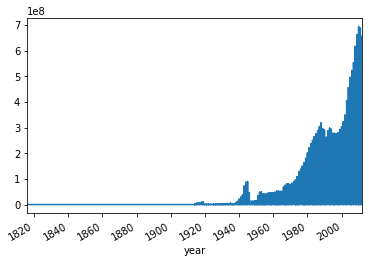

In [14]:
df['milex'].plot()

# Modeling

In [15]:
def test(models, data, iterations = 100):
    results = {}
    for i in models:
        r2_train = []
        r2_test = []
        for j in range(iterations):
            X_train, X_test, y_train, y_test = train_test_split(df.drop('milex',axis=1), 
                                                                df['milex'], 
                                                                test_size= 0.2)
            r2_test.append(metrics.r2_score(y_test,
                                            models[i].fit(X_train, 
                                                         y_train).predict(X_test)))
            r2_train.append(metrics.r2_score(y_train, 
                                             models[i].fit(X_train, 
                                                          y_train).predict(X_train)))
        results[i] = [np.mean(r2_train), np.mean(r2_test)]
    return pd.DataFrame(results)

## Base models - OLS, Lasso, Ridge regressions

In [16]:
models = {'OLS': linear_model.LinearRegression(),
         'Lasso': linear_model.Lasso(),
         'Ridge': linear_model.Ridge(),}
test(models, df)

,OLS,Lasso,Ridge
0,0.744563,0.745766,0.745190
1,0.725837,0.722013,0.721809


## Models with grid search

In [17]:
lasso_params = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03]}
ridge_params = {'alpha':[200, 230, 250,265, 270, 275, 290, 300, 500]}

models2 = {'OLS': linear_model.LinearRegression(),
           'Lasso': GridSearchCV(linear_model.Lasso(), 
                               param_grid=lasso_params).fit(df.drop('milex',axis=1), df['milex']).best_estimator_,
           'Ridge': GridSearchCV(linear_model.Ridge(), 
                               param_grid=ridge_params).fit(df.drop('milex',axis=1), df['milex']).best_estimator_,}

test(models2, df)

,OLS,Lasso,Ridge
0,0.744798,0.743517,0.739527
1,0.727700,0.734014,0.728769


## Models with polynomial features

In [18]:
lasso_params = {'fit__alpha':[0.005, 0.02, 0.03, 0.05, 0.06]}
ridge_params = {'fit__alpha':[550, 580, 600, 620, 650]}

pipe1 = Pipeline([('poly', PolynomialFeatures()),
                 ('fit', linear_model.LinearRegression())])
pipe2 = Pipeline([('poly', PolynomialFeatures()),
                 ('fit', linear_model.Lasso())])
pipe3 = Pipeline([('poly', PolynomialFeatures()),
                 ('fit', linear_model.Ridge())])

models3 = {'OLS': pipe1,
           'Lasso': GridSearchCV(pipe2, 
                                 param_grid=lasso_params).fit(df.drop('milex',axis=1), df['milex']).best_estimator_ ,
           'Ridge': GridSearchCV(pipe3, 
                                 param_grid=ridge_params).fit(df.drop('milex',axis=1), df['milex']).best_estimator_,}

test(models3, df)

,OLS,Lasso,Ridge
0,0.938506,0.937852,0.938883
1,0.926315,0.915422,0.921091
